# Final Individual Assignment

As a final individual assignment, you will have the chance to demonstrate your individual mastery of the core tasks we have been doing throughout our team case studies.

For this assignment, you must:

Choose a dataset
Apply the tools/algorithms we'v studied this semester to discover something of value from it
Discuss how your work meets the project outcomes
The project outcomes for this project are:

Demonstrates understanding of the business needs / context of the data
Demonstrates ability to handle non-trivial dataset (e.g., data set size, complexity of features, missing data, redundant attributes, obtaining the data, etc.)
Demonstrates proper algorithm selection and application
Discovered something interesting / of value (e.g., about the data, about the algorithms and their limitations in this context, something actionable for a stakeholder, etc.)
Demonstrates understanding of limitations of the solution and potential ethical issues
 
## Part 1 - Choose a Dataset

You are welcome to choose any dataset we have seen this semester, or a separate dataset that you have found on your own. Keep in mind that your dataset must be complex enough to demonstrate your mastery of the project outcomes above. If you choose one that we've used before, please keep in mind that you'll need to do additional work that specifically demonstrates your individual mastery of the topics.

If you are looking for a new dataset, a good place to find some interesting ones is: https://www.kaggle.com/. Another place that has a lot of datasets (but not quite as fun ones as Kaggle) is: the UCI data repository.

Be careful that you don't spend too much time looking for the best possible dataset, because you may not have enough time to actually work with it.

## Part 2 - Apply the Tools/Algorithms of the course

Once you have selected a dataset, you need to apply the tools and algorithms we've discussed this semester to discover something interesting or of value. The specific tools, libraries, or algorithms you use are up to you. One of the outcomes is to show that you know how to apply an appropriate tool to solve a given problem.

You are welcome to leverage ideas or code from your team case study work this semester, but keep in mind that you need to demonstrate your individual mastery of the topics.

## Part 3 - Discuss Mastery of Project Outcomes

When you have finished your work, please submit a document that contains the following:

* A link to your Colab notebook.
* A short description of what you did and your results (a few paragraphs)
* A list of the project outcomes with a few sentences for each one explaining how your individual work on this project demonstrates your mastery of that outcome.
* Self-assessment and justification of the grading category best describes your project.

The self-assessment categories are:

1. All requirements were met and additional work was done to demonstrate creativity and excellence by going above and beyond.
2. All requirements were met.
3. Some attempt was made, but was slightly deficient in approach or understanding.
4. Some attempt was made, but was significantly deficient in approach or understanding.
5. Some attempt was made, but was extremely deficient in approach or understanding.
6. No attempt was made.

### Part 1 

#### Choose a Dataset

In [ ]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import altair as alt

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
hits = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/spotify/data.csv",keep_default_na=False)
hits = hits.dropna()
hits = hits.drop('artists', axis = 1)
hits = hits.drop('id', axis = 1)
hits = hits.drop('name', axis = 1)
hits = hits.drop('release_date', axis = 1)
hits.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
0,0.995,0.708,158648,0.1950,0,0.563,10,0.1510,-12.428,1,0,0.0506,118.469,0.7790,1928
1,0.994,0.379,282133,0.0135,0,0.901,8,0.0763,-28.454,1,0,0.0462,83.972,0.0767,1928
2,0.604,0.749,104300,0.2200,0,0.000,5,0.1190,-19.924,0,0,0.9290,107.177,0.8800,1928
3,0.995,0.781,180760,0.1300,0,0.887,1,0.1110,-14.734,0,0,0.0926,108.003,0.7200,1928
4,0.990,0.210,687733,0.2040,0,0.908,11,0.0980,-16.829,1,1,0.0424,62.149,0.0693,1928


In [ ]:
hits.dtypes

acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
popularity            int64
speechiness         float64
tempo               float64
valence             float64
year                  int64
dtype: object

In [ ]:
hits['popularity'].describe()

count    169909.000000
mean         31.556610
std          21.582614
min           0.000000
25%          12.000000
50%          33.000000
75%          48.000000
max         100.000000
Name: popularity, dtype: float64

### Part 2

#### Apply the Tools/Algorithms of the course

In [ ]:
train_dataset = hits.sample(frac=0.8, random_state=0)
test_dataset = hits.drop(train_dataset.index)

In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

In [ ]:
train_labels = train_features.pop('popularity')
test_labels = test_features.pop('popularity')

In [ ]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_features))

In [ ]:
print(normalizer.mean.numpy())

[ 4.93046016e-01  5.37958026e-01  2.31361500e+05  4.88690704e-01
  8.48764405e-02  1.62142396e-01  5.19090414e+00  2.06531569e-01
 -1.13711491e+01  7.08895206e-01  9.41436961e-02  1.16970245e+02
  5.31847119e-01  1.97722571e+03]


In [ ]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[     0.12      0.64 129440.        0.83      0.        0.        1.
       0.28     -5.93      1.        0.05     81.78      0.83   1963.  ]]

Normalized: [[-1.    0.59 -0.84  1.26 -0.3  -0.52 -1.19  0.44  0.96  0.64 -0.3  -1.14
   1.14 -0.56]]


In [ ]:
pop = np.array(train_features['year'])
temp_normalizer = preprocessing.Normalization(input_shape=[1,])
temp_normalizer.adapt(pop)

In [ ]:
temp_model = tf.keras.Sequential([
    temp_normalizer,
    layers.Dense(10, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(units=1)
])

temp_model.predict(pop[:10])

array([[0.5611639 ],
       [0.4009655 ],
       [0.91618854],
       [0.11816195],
       [0.05082778],
       [0.4033753 ],
       [0.5491007 ],
       [0.08779788],
       [0.32016447],
       [0.24558659]], dtype=float32)

In [ ]:
dnn_model = keras.Sequential([
      normalizer,
      layers.Dense(3, activation='elu'),
      layers.Dense(3, activation='elu'),
      layers.Dense(1)
  ])
dnn_model.compile(loss='mean_absolute_error',
                  optimizer=tf.keras.optimizers.Adam(0.001))
dnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 14)                29        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 45        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 4         
Total params: 90
Trainable params: 61
Non-trainable params: 29
_________________________________________________________________


In [ ]:
history = dnn_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, epochs=30)

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
25,6.565021,6.601289,25
26,6.563701,6.594553,26
27,6.563156,6.593310,27
28,6.562243,6.599164,28
29,6.560547,6.601587,29


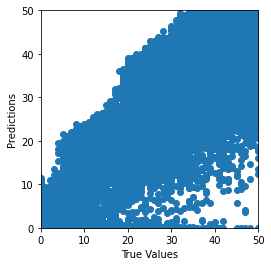

In [ ]:
test_predictions = dnn_model.predict(test_features).flatten()
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

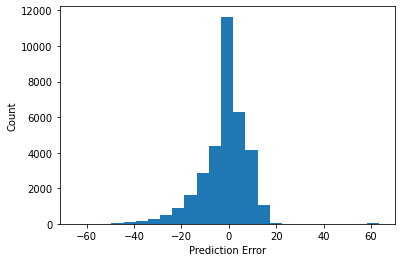

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

In [ ]:
dnn_model = keras.Sequential([
      normalizer,
      layers.Dense(150, activation='relu'),
      layers.Dropout(.5),
      layers.Dense(15, activation='relu'),
      layers.Dropout(.2),
      layers.Dense(10, activation='relu'),
      layers.Dropout(.1),
      layers.Dense(1, activation='linear')
  ])
dnn_model.compile(loss='mean_absolute_error',
                  optimizer=tf.keras.optimizers.Adam(0.01))
dnn_model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 14)                29        
_________________________________________________________________
dense_6 (Dense)              (None, 150)               2250      
_________________________________________________________________
dropout (Dropout)            (None, 150)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 15)                2265      
_________________________________________________________________
dropout_1 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                160       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)               

In [ ]:
history = dnn_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, epochs=30)

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
25,7.689349,6.912765,25
26,7.675001,7.322006,26
27,7.658055,6.964977,27
28,7.677517,6.852284,28
29,7.691419,6.728859,29


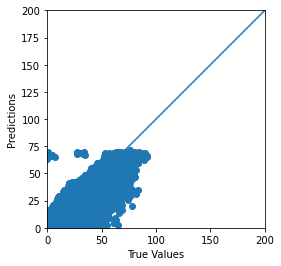

In [ ]:
test_predictions = dnn_model.predict(test_features).flatten()
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 200]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

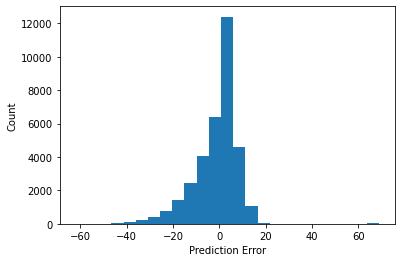

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

### Part 3

#### Discuss Mastery of Project Outcomes

Colab Notebook: https://colab.research.google.com/gist/kctolli/2326cbc187e9609af52d2fcbe473d1ae/individual-assignment.ipynb

I created a neural network to predict the popularity of spotify songs. I was able to see that each epoch will increase the prediction values making it more accurate. The prediction error decreases after each epoch. I feel that my neural network is quite accurate.   

* Demonstrates understanding of the business needs / context of the data
  *   I was able to create an predictive algorithm for popularity 
  *   This can help spotify performs know how to make it
* Demonstrates ability to handle non-trivial dataset (e.g., data set size, complexity of features, missing data, redundant attributes, obtaining the data, etc.)
  *   I used two functions drop and dropna to manipulate data
* Demonstrates proper algorithm selection and application
  *   I chose a neural network due to fact it can be trained with data to increase the predictions
* Discovered something interesting / of value (e.g., about the data, about the algorithms and their limitations in this context, something actionable for a stakeholder, etc.)
  *   I learned that the algorithm doesn't like string values they prefer numeric values (ints and floats)
* Demonstrates understanding of limitations of the solution and potential ethical issues
  *   This solution has a limitation of only with numeric values





I feel that with my level of mastery I deserve a 3. I feel that I was able to create a working neural network. I just am missing some understanding of the material. I feel like I was able to learn a lot from this project. I learned a lot about neural networks from this project. 